In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
from os.path import join
import numpy as np
import pandas as pd

In [41]:
'/Users/queezz/Dropbox/Experiments/2019-Ito-kun/'
bpth = join(os.path.expanduser('~'), 'Dropbox','Experiments','2019-Ito-kun','Data')
p1 = 'Pressure2'
wdir = join(bpth,p1)
lst = os.listdir(wdir)

In [42]:
lst1 = sorted([i for i in lst if os.path.getsize(join(wdir,i)) > 1000])

In [43]:
f = lst1[-1]
data = pd.read_csv(join(wdir,f))

In [47]:
%run ~/Dropbox/iPyNotes/python_scripts/tools.py

<Figure size 432x288 with 0 Axes>

(0, 4)

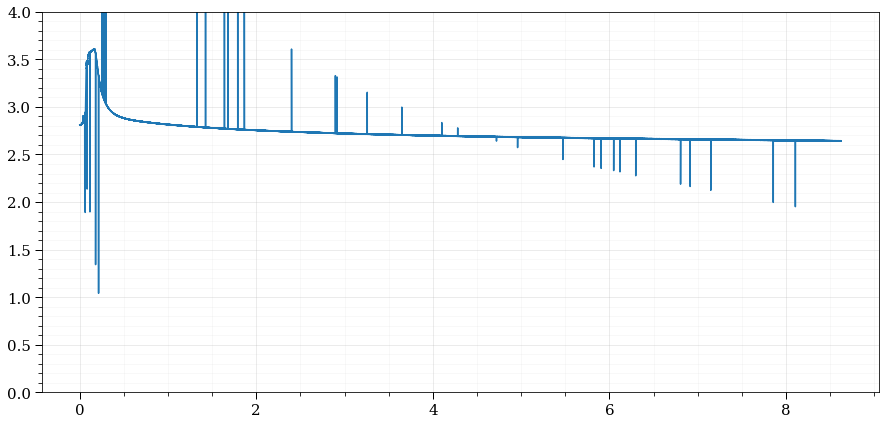

In [54]:
font_setup(size=15)
gcf().set_size_inches(15,7)
plot(data['Time']/3600,data['Pressure2'])
gritix()
ylim(0,4)